https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data

Business Idea:

Using brain MRI's images, we will make a classification neural network for early detection of these tumors and their type to select the most effective treatment plan, increasing the chance of saving a patients life. We plan to execute this task through the use of a convolutional neural network to take advantage of positional attributes of pixels from the scans.

Data explanation:
This image dataset of brain MRIs is a combination of the figshare, SARTAJ dataset, and Br35H dataset. Within the training and testing set, there are 4 sub folders of brain MRIs containing a total of 7,023 images. Each folder is a different class of tumor (or no tumor). These classes are glioma, meningioma, no tumor and pituitary. Glioma tumors are usually found in the brain or spinal cord and can be aggressive. Meningioma are often benign but can still cause problems due to pressure on the brain. A pituitary tumor is located in the part of the brain that controls hormones, and a tumor here can impact this hormone production.

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
data_path ='/content/drive/My Drive/Colab Notebooks/data'
# List files
print(os.listdir(data_path))

['Training', 'Testing']


In [ ]:
training_path = os.path.join(data_path, 'Training') #the data is still being uploaded to my google drive
print(os.listdir(training_path))

['meningioma', 'notumor', 'pituitary', 'glioma']


In [ ]:
testing_path = os.path.join(data_path, 'Testing')
print(os.listdir(testing_path))

['meningioma', 'glioma', 'notumor', 'pituitary']


In [7]:
#GITHUB: From the kaggle dataset, they provided the link to a github that provided this code below to preprocess each image.

import numpy as np
from tqdm import tqdm
import cv2
import os
import imutils



def crop_img(img):
	"""
	Finds the extreme points on the image and crops the rectangular out of them
	"""
	gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
	gray = cv2.GaussianBlur(gray, (3, 3), 0)

	# threshold the image, then perform a series of erosions +
	# dilations to remove any small regions of noise
	thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
	thresh = cv2.erode(thresh, None, iterations=2)
	thresh = cv2.dilate(thresh, None, iterations=2)

	# find contours in thresholded image, then grab the largest one
	cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
	cnts = imutils.grab_contours(cnts)
	c = max(cnts, key=cv2.contourArea)

	# find the extreme points
	extLeft = tuple(c[c[:, :, 0].argmin()][0])
	extRight = tuple(c[c[:, :, 0].argmax()][0])
	extTop = tuple(c[c[:, :, 1].argmin()][0])
	extBot = tuple(c[c[:, :, 1].argmax()][0])
	ADD_PIXELS = 0
	new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

	return new_img


training_path_dir = os.listdir(training_path)
testing_path_dir = os.listdir(testing_path)
IMG_SIZE = 256

for dir in training_path_dir:
  save_path = 'cleaned/training_path/'+ dir
  path = os.path.join(training_path,dir)
  image_dir = os.listdir(path)
  for img in image_dir:
    image = cv2.imread(os.path.join(path,img))
    new_img = crop_img(image)
    new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
    if not os.path.exists(save_path):
      os.makedirs(save_path)
    cv2.imwrite(save_path+'/'+img, new_img)

for dir in testing_path_dir:
  save_path = 'cleaned/testing_path/'+ dir
  path = os.path.join(testing_path,dir)
  image_dir = os.listdir(path)
  for img in image_dir:
    image = cv2.imread(os.path.join(path,img))
    new_img = crop_img(image)
    new_img = cv2.resize(new_img,(IMG_SIZE,IMG_SIZE))
    if not os.path.exists(save_path):
      os.makedirs(save_path)
    cv2.imwrite(save_path+'/'+img, new_img)

In [8]:
print(os.listdir("cleaned/training_path"))

['meningioma', 'glioma', 'notumor', 'pituitary']


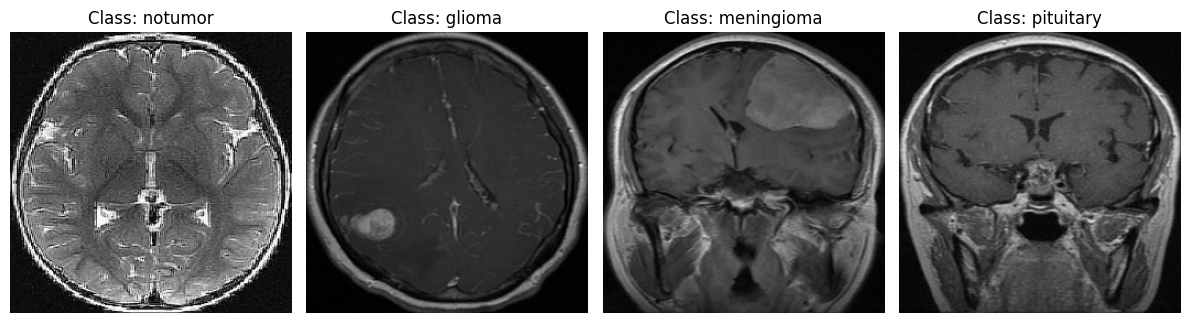

In [9]:
import matplotlib.pyplot as plt


#chatgpt to see how to print 1 image from each class
class_names = ['notumor', 'glioma', 'meningioma', 'pituitary']
base_path = 'cleaned/training_path'
plt.figure(figsize=(12, 10))

for idx, class_name in enumerate(class_names):
    class_path = os.path.join(base_path, class_name)
    image_files = os.listdir(class_path)

    if not image_files:
        continue

    # Load the first image in the class folder
    img_path = os.path.join(class_path, image_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Plot the image
    plt.subplot(1, 4, idx + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.axis("off")

plt.tight_layout()
plt.show()

#### Cadet Name: Ireland McCauley and Ethan Collins

#### Date: 17 APR 2025

#### \(IM, EC ) I CERTIFY THAT I HAVE COMPLETELY DOCUMENTED ALL SOURCES THAT I USED TO COMPLETE THIS ASSIGNMENT AND THAT I ACKNOWLEDGED ALL ASSISTANCE I RECEIVED IN THE COMPLETION OF THIS ASSIGNMENT.

#### OR

#### \(Initial only one\) I CERTIFY THAT I DID NOT USE ANY SOURCES OR RECEIVE ANY ASSISTANCE REQUIRING DOCUMENTATION WHILE COMPLETING THIS ASSIGNMENT.



# Acknowledgement of assistance

Github. Assistance given to the author. Using the kaggle webpage with our Brain MRI dataset, they provided the link to a github page where they provided the preprocessing code for the MRI images. We pasted that code after defining our training and test paths.  Github \(https://github.com/masoudnick/Brain-Tumor-MRI-Classification/blob/main/Preprocessing.py) . West Point, NY, 17APR2025.


ChatGPT. Assistance given to the author. I asked chatgpt how I could use code from a previous lesson that displayed images and apply it to my images in certain folders. It gave me the code necessary to show 1 image from each class, and I tweaked it slightly to match my directory.  ChatGPT \(https://chatgpt.com/share/68012df0-300c-8012-8c4b-02938810bc89) . West Point, NY, 17APR2025.



In [10]:
#chatGPT to see how to change the X data to be the pixel values

import os
import numpy as np
import cv2

# Define constants
class_names = ['notumor', 'glioma', 'meningioma', 'pituitary']
label_map = {name: idx for idx, name in enumerate(class_names)}
train_base_path = 'cleaned/training_path'
test_base_path = 'cleaned/testing_path'
image_size = (256, 256)  # You can change this depending on your model input

# Function to load and preprocess image data
def load_images_and_labels(base_path):
    images = []
    labels = []
    for class_name in class_names:
        class_path = os.path.join(base_path, class_name)
        if not os.path.exists(class_path):
            continue
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                continue  # Skip unreadable images
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label_map[class_name])
    return np.array(images), np.array(labels)

# Load actual image pixel data
X_train, y_train = load_images_and_labels(train_base_path)
X_test, y_test = load_images_and_labels(test_base_path)


In [11]:
X_train.shape

(5712, 256, 256, 3)

array([[[12, 12, 12],
        [17, 17, 17],
        [ 7,  7,  7],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [13, 13, 13]],

       [[16, 16, 16],
        [20, 20, 20],
        [10, 10, 10],
        ...,
        [14, 14, 14],
        [13, 13, 13],
        [17, 17, 17]],

       [[14, 14, 14],
        [24, 24, 24],
        [11, 11, 11],
        ...,
        [16, 16, 16],
        [14, 14, 14],
        [16, 16, 16]],

       ...,

       [[14, 14, 14],
        [13, 13, 13],
        [11, 11, 11],
        ...,
        [10, 10, 10],
        [13, 13, 13],
        [17, 17, 17]],

       [[ 7,  7,  7],
        [ 5,  5,  5],
        [16, 16, 16],
        ...,
        [17, 17, 17],
        [14, 14, 14],
        [13, 13, 13]],

       [[11, 11, 11],
        [10, 10, 10],
        [23, 23, 23],
        ...,
        [24, 24, 24],
        [18, 18, 18],
        [12, 12, 12]]], dtype=uint8)
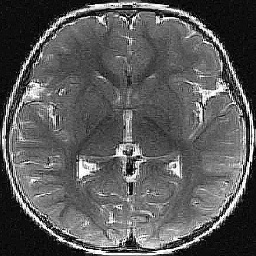

In [12]:
X_train[0]

In [13]:
#make validation set

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)


In [ ]:
import tensorflow as tf

#first try resnet50
base_model = tf.keras.applications.ResNet50(weights="imagenet",
                                                  include_top=False, input_shape=(256, 256, 3))

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(4, activation="softmax")(avg)
model = tf.keras.models.Model(inputs = base_model.input, outputs = output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5)

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 38s 206ms/step - accuracy: 0.6699 - loss: 20.8913 - val_accuracy: 0.8583 - val_loss: 5.8039
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 26s 120ms/step - accuracy: 0.8788 - loss: 4.9552 - val_accuracy: 0.7795 - val_loss: 9.2536
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 122ms/step - accuracy: 0.8857 - loss: 4.2571 - val_accuracy: 0.8268 - val_loss: 7.8678
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.8915 - loss: 4.4139 - val_accuracy: 0.8924 - val_loss: 4.7505
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.9059 - loss: 3.9901 - val_accuracy: 0.8495 - val_loss: 6.1256


<Axes: >

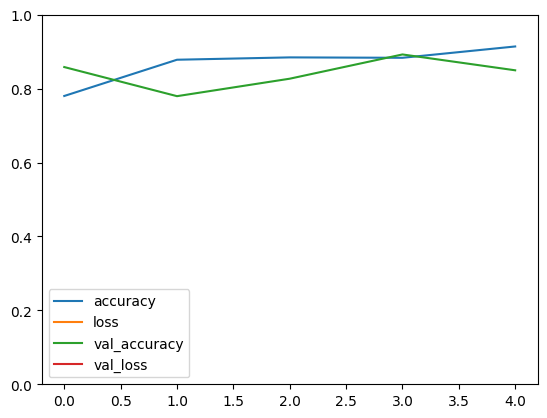

In [ ]:
import pandas as pd
#asked gemini how to make it only go up to 1 on the y axis
pd.DataFrame(history.history).plot(ylim=(0, 1))  # Set y-axis limits

In [ ]:
model.evaluate(X_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9159 - loss: 3.3810


[6.136425495147705, 0.8410295248031616]

In [ ]:
#asked chatGPT how to get classification report
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
# gemini said to Specify the 'average' parameter for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
recall = recall_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted') # Changed to 'weighted'

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step
Accuracy: 0.8410295230885693
Precision: 0.8927313016978133
Recall: 0.8410295230885693
F1 Score: 0.8442077657260348


In [16]:
#fine tune
#asked chatGPT to create a grid search for type of loss, early stopping, and learning rate
#chatGPT to fix errors after my best model was not being saved correctly

import tensorflow as tf
import numpy as np

# Define your base model constructor
def create_model():
    base_model = tf.keras.applications.ResNet50(weights="imagenet",
                                                 include_top=False,
                                                 input_shape=(256, 256, 3))
    avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    output = tf.keras.layers.Dense(4, activation="softmax")(avg)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=output)
    return model, base_model

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

# Fine-tuning function
def fine_tune_model(optimizer_type, learning_rate, fine_tune_at):
    model, base_model = create_model()

    # Unfreeze layers
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    # Choose optimizer
    if optimizer_type == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        raise ValueError("Unsupported optimizer")

    # Compile and train
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        callbacks=[early_stopping],
                        verbose=0)

    best_val_acc = max(history.history["val_accuracy"])

    return best_val_acc, model


# Grid search params
optimizers = ["sgd"]
learning_rates = [1e-2, 1e-3, 1e-4]
fine_tune_layers = [100, 140, 160]

# Run grid search
results = []
best_accuracy = 0
best_model = None
best_config = None

for opt in optimizers:
    for lr in learning_rates:
        for ft in fine_tune_layers:
            print(f"Testing: optimizer={opt}, lr={lr}, fine_tune_at={ft}")
            acc, trained_model = fine_tune_model(opt, lr, ft)
            print(f"→ Val Accuracy: {acc:.4f}")
            results.append((acc, (opt, lr, ft)))

            if acc > best_accuracy:
                best_accuracy = acc
                best_model = trained_model   # Save trained model
                best_config = (opt, lr, ft)  # Save config also

# Save best trained model
best_model.save("best_model.keras")

# Print best config
print("\n✅ Best Config:")
print(f"Optimizer: {best_config[0]}, Learning Rate: {best_config[1]}, Fine-Tune Layer: {best_config[2]}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")



Testing: optimizer=sgd, lr=0.01, fine_tune_at=100
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
→ Val Accuracy: 0.9860
Testing: optimizer=sgd, lr=0.01, fine_tune_at=140
→ Val Accuracy: 0.9799
Testing: optimizer=sgd, lr=0.01, fine_tune_at=160
→ Val Accuracy: 0.9790
Testing: optimizer=sgd, lr=0.001, fine_tune_at=100
→ Val Accuracy: 0.9790
Testing: optimizer=sgd, lr=0.001, fine_tune_at=140
→ Val Accuracy: 0.9694
Testing: optimizer=sgd, lr=0.001, fine_tune_at=160
→ Val Accuracy: 0.9738
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=100
→ Val Accuracy: 0.9624
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=140
→ Val Accuracy: 0.9624
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=160
→ Val Accuracy: 0.9484

✅ Best Config:
Optimizer: sgd, Learning Rate: 0.01, Fine-Tune Layer: 100
Best Validation Accuracy: 0.9860


In [17]:
#chatGPT to see how to extract the best model stats
import tensorflow as tf
# Load best model
best_model = tf.keras.models.load_model("best_model.keras")

# Predict
y_pred_probs = best_model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n📊 Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 176ms/step

📊 Evaluation on Test Set:
Accuracy: 0.9879
Precision: 0.9879
Recall: 0.9879
F1 Score: 0.9879


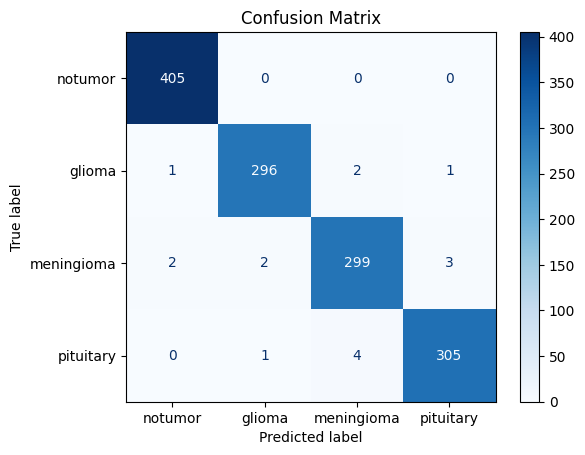

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#chatGPT to see hwo to make matrix
cm = confusion_matrix(y_test, y_pred)

cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
cm.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

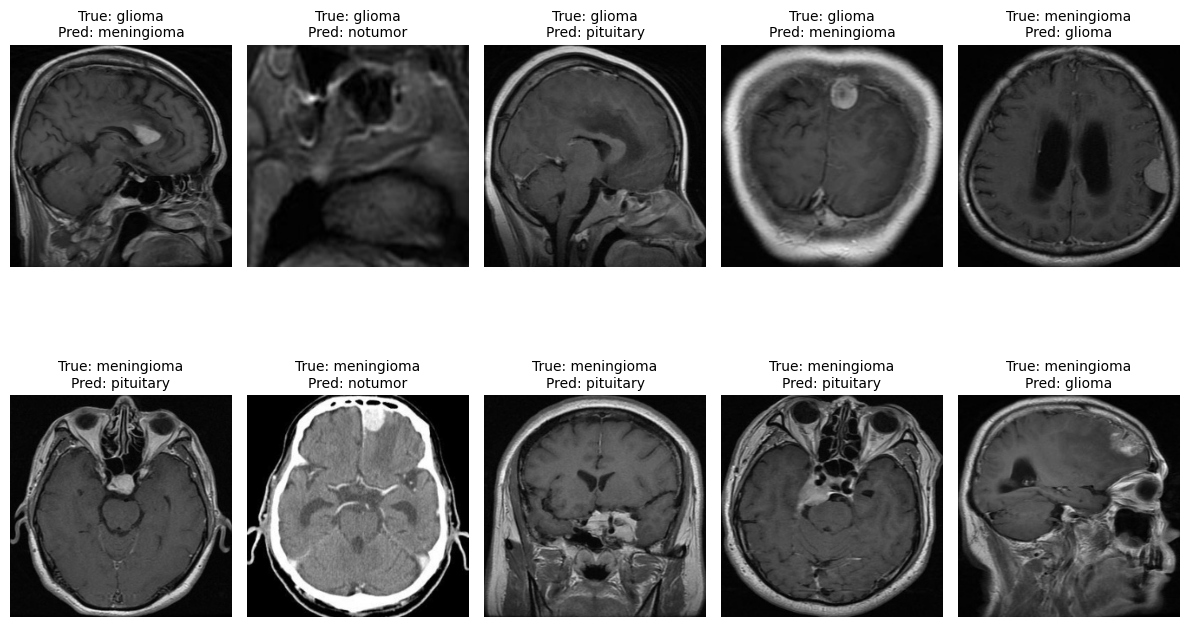

In [20]:
#chatGPT to see how to display misclasses
misclassified_indices = np.where(y_pred != y_test)[0]

# How many to show
num_to_show = 10
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_indices[:num_to_show]):
    plt.subplot(2, 5, i + 1)
    image = X_test[idx]

    # If grayscale, squeeze the channel
    if image.shape[-1] == 1:
        image = image.squeeze()

    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()


VGG19 pretrained Model


In [ ]:
base_model2 = tf.keras.applications.VGG19(weights="imagenet",
                                                  include_top=False, input_shape=(256, 256, 3))

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model2.output)
output = tf.keras.layers.Dense(4, activation="softmax")(avg)
model2 = tf.keras.models.Model(inputs = base_model2.input, outputs = output)

In [ ]:
for layer in base_model2.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model2.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5)

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 62s 418ms/step - accuracy: 0.6725 - loss: 46.6153 - val_accuracy: 0.8801 - val_loss: 14.2350
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 68s 324ms/step - accuracy: 0.8435 - loss: 20.7799 - val_accuracy: 0.8583 - val_loss: 14.0229
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 81s 317ms/step - accuracy: 0.8712 - loss: 13.8285 - val_accuracy: 0.8985 - val_loss: 9.5735
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 46s 324ms/step - accuracy: 0.8489 - loss: 18.0180 - val_accuracy: 0.8714 - val_loss: 17.1422
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 82s 327ms/step - accuracy: 0.8794 - loss: 14.9646 - val_accuracy: 0.8985 - val_loss: 12.5791


<Axes: >

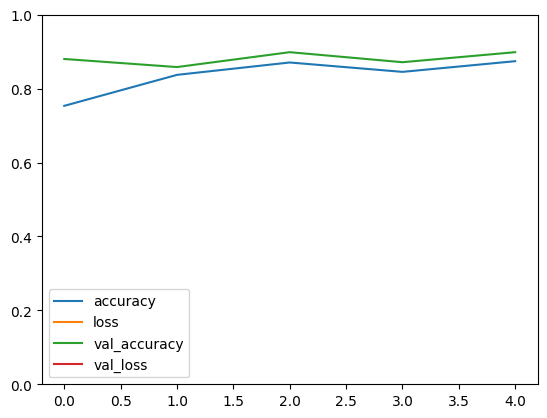

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(ylim=(0, 1))

In [ ]:
y_pred_probs = model2.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
recall = recall_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted') # Changed to 'weighted'

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step
Accuracy: 0.8887206661619985
Precision: 0.8991886078794682
Recall: 0.8887206661619985
F1 Score: 0.8879188079715049


In [ ]:
#fine tune

def create_model2():
    base_model2 = tf.keras.applications.VGG19(weights="imagenet",
                                                  include_top=False, input_shape=(256, 256, 3))
    avg = tf.keras.layers.GlobalAveragePooling2D()(base_model2.output)
    output = tf.keras.layers.Dense(4, activation="softmax")(avg)
    model2 = tf.keras.models.Model(inputs = base_model2.input, outputs = output)
    return model2, base_model2

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

# Fine-tuning function
def fine_tune_model(optimizer_type, learning_rate, fine_tune_at):
    model, base_model = create_model2()

    # Unfreeze layers
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    # Choose optimizer
    if optimizer_type == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        raise ValueError("Unsupported optimizer")

    # Compile and train
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        callbacks=[early_stopping],
                        verbose=0)

    best_val_acc = max(history.history["val_accuracy"])

    return best_val_acc, model


# Grid search params
optimizers = ["sgd"]
learning_rates = [1e-2, 1e-3, 1e-4]
fine_tune_layers = [100, 140, 160]

# Run grid search
results = []
best_accuracy = 0
best_model = None
best_config = None

for opt in optimizers:
    for lr in learning_rates:
        for ft in fine_tune_layers:
            print(f"Testing: optimizer={opt}, lr={lr}, fine_tune_at={ft}")
            acc, trained_model = fine_tune_model(opt, lr, ft)
            print(f"→ Val Accuracy: {acc:.4f}")
            results.append((acc, (opt, lr, ft)))

            if acc > best_accuracy:
                best_accuracy = acc
                best_model = trained_model   # Save trained model
                best_config = (opt, lr, ft)  # Save config also

# Save best trained model
best_model.save("best_model2.keras")

# Print best config
print("\n✅ Best Config:")
print(f"Optimizer: {best_config[0]}, Learning Rate: {best_config[1]}, Fine-Tune Layer: {best_config[2]}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

Testing: optimizer=sgd, lr=0.01, fine_tune_at=100
→ Val Accuracy: 0.8985
Testing: optimizer=sgd, lr=0.01, fine_tune_at=140
→ Val Accuracy: 0.8968
Testing: optimizer=sgd, lr=0.01, fine_tune_at=160
→ Val Accuracy: 0.8915
Testing: optimizer=sgd, lr=0.001, fine_tune_at=100
→ Val Accuracy: 0.8933
Testing: optimizer=sgd, lr=0.001, fine_tune_at=140
→ Val Accuracy: 0.9003
Testing: optimizer=sgd, lr=0.001, fine_tune_at=160
→ Val Accuracy: 0.8784
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=100
→ Val Accuracy: 0.8644
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=140
→ Val Accuracy: 0.8784
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=160
→ Val Accuracy: 0.8758

✅ Best Config:
Optimizer: sgd, Learning Rate: 0.001, Fine-Tune Layer: 140
Best Validation Accuracy: 0.9003


In [ ]:
# Load best model
best_model2 = tf.keras.models.load_model("best_model2.keras")

# Predict
y_pred_probs = best_model2.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n📊 Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step

📊 Evaluation on Test Set:
Accuracy: 0.8910
Precision: 0.8894
Recall: 0.8910
F1 Score: 0.8898


InceptionV3 model

In [ ]:
#Inception

base_model3 = tf.keras.applications.InceptionV3(weights="imagenet",
                                                  include_top=False, input_shape=(256, 256, 3))

avg = tf.keras.layers.GlobalAveragePooling2D()(base_model3.output)
output = tf.keras.layers.Dense(4, activation="softmax")(avg)
model3 = tf.keras.models.Model(inputs = base_model3.input, outputs = output)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
for layer in base_model3.layers:
    layer.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model3.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5)

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 56s 277ms/step - accuracy: 0.3975 - loss: 9261.8955 - val_accuracy: 0.5941 - val_loss: 4298.1885
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 109ms/step - accuracy: 0.6169 - loss: 3750.3223 - val_accuracy: 0.6780 - val_loss: 2669.9551
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - accuracy: 0.6123 - loss: 4273.5142 - val_accuracy: 0.6868 - val_loss: 2535.7090
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.6788 - loss: 3262.3799 - val_accuracy: 0.5608 - val_loss: 5095.7422
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.6851 - loss: 2742.8582 - val_accuracy: 0.6833 - val_loss: 2930.8193


<Axes: >

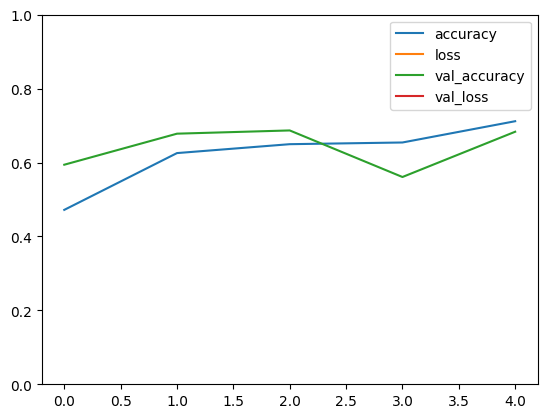

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(ylim=(0, 1))

In [ ]:
y_pred_probs = model3.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
recall = recall_score(y_test, y_pred, average='weighted') # Changed to 'weighted'
f1 = f1_score(y_test, y_pred, average='weighted') # Changed to 'weighted'

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 325ms/step
Accuracy: 0.6911430734292203
Precision: 0.7628748042589231
Recall: 0.6911430734292203
F1 Score: 0.6270979334555212


In [ ]:
#fine tune


def create_model3():
    base_model3 = tf.keras.applications.InceptionV3(weights="imagenet",
                                                  include_top=False, input_shape=(256, 256, 3))
    avg = tf.keras.layers.GlobalAveragePooling2D()(base_model3.output)
    output = tf.keras.layers.Dense(4, activation="softmax")(avg)
    model3 = tf.keras.models.Model(inputs = base_model3.input, outputs = output)
    return model3, base_model3

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True)

# Fine-tuning function
def fine_tune_model(optimizer_type, learning_rate, fine_tune_at):
    model, base_model = create_model3()

    # Unfreeze layers
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False
    for layer in base_model.layers[fine_tune_at:]:
        layer.trainable = True

    # Choose optimizer
    if optimizer_type == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    else:
        raise ValueError("Unsupported optimizer")

    # Compile and train
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        callbacks=[early_stopping],
                        verbose=0)

    best_val_acc = max(history.history["val_accuracy"])

    return best_val_acc, model


# Grid search params
optimizers = ["sgd"]
learning_rates = [1e-2, 1e-3, 1e-4]
fine_tune_layers = [100, 140, 160]

# Run grid search
results = []
best_accuracy = 0
best_model = None
best_config = None

for opt in optimizers:
    for lr in learning_rates:
        for ft in fine_tune_layers:
            print(f"Testing: optimizer={opt}, lr={lr}, fine_tune_at={ft}")
            acc, trained_model = fine_tune_model(opt, lr, ft)
            print(f"→ Val Accuracy: {acc:.4f}")
            results.append((acc, (opt, lr, ft)))

            if acc > best_accuracy:
                best_accuracy = acc
                best_model = trained_model   # Save trained model
                best_config = (opt, lr, ft)  # Save config also

# Save best trained model
best_model.save("best_model3.keras")

# Print best config
print("\n✅ Best Config:")
print(f"Optimizer: {best_config[0]}, Learning Rate: {best_config[1]}, Fine-Tune Layer: {best_config[2]}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

Testing: optimizer=sgd, lr=0.01, fine_tune_at=100
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
→ Val Accuracy: 0.9361
Testing: optimizer=sgd, lr=0.01, fine_tune_at=140
→ Val Accuracy: 0.9213
Testing: optimizer=sgd, lr=0.01, fine_tune_at=160
→ Val Accuracy: 0.8539
Testing: optimizer=sgd, lr=0.001, fine_tune_at=100
→ Val Accuracy: 0.9484
Testing: optimizer=sgd, lr=0.001, fine_tune_at=140
→ Val Accuracy: 0.9466
Testing: optimizer=sgd, lr=0.001, fine_tune_at=160
→ Val Accuracy: 0.9108
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=100
→ Val Accuracy: 0.9256
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=140
→ Val Accuracy: 0.9221
Testing: optimizer=sgd, lr=0.0001, fine_tune_at=160
→ Val Accuracy: 0.9151

✅ Best Config:
Optimizer: sgd, Learning Rate: 0.001, Fine-Tune Layer: 100
Best Validation Accuracy: 0.9484


In [ ]:
# Load best model
best_model3 = tf.keras.models.load_model("best_model3.keras")

# Predict
y_pred_probs = best_model3.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n📊 Evaluation on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 185ms/step

📊 Evaluation on Test Set:
Accuracy: 0.9508
Precision: 0.9505
Recall: 0.9508
F1 Score: 0.9505


https://www.geeksforgeeks.org/top-pre-trained-models-for-image-classification/#3-vgg-visual-geometry-group
this website had different pretrained models that perform well

# Acknowledgement of assistance

ChatGPT. Assistance given to the author, AI. Using chatGPT, I provided it with my current code from the IPR, and asked how to create the testing and training labels. I also asked it how to convert X_train and X_test from directories, to the actual pixel data. I used the code that ChatGPT provided and implemented it in our code above. ChatGPT \(https://chatgpt.com/share/681124f2-a114-8012-8b6f-8c82eaa704b5) . West Point, NY, 29APR2025.

Gemini. Assistance given to the author, AI. Using Gemini, I asked it how I can adjust my graph to set the y-axis limit to 1. I used the code it provided to make this small adjustment. Gemini \(https://colab.research.google.com) . West Point, NY, 29APR2025.

ChatGPT. Assistance given to the author, AI. Using chatGPT, I asked it how to get the classification report once you finish training. It told me that I need to use the .predict function, then pass those results into the np.argmax with axis =1 to get the predicted class. Once you have that, you can then compare those results to the true labels and obtain your desired metrics. ChatGPT \(https://chatgpt.com/share/681124f2-a114-8012-8b6f-8c82eaa704b5) . West Point, NY, 29APR2025.

ChatGPT. Assistance given to the author, AI. Using chatGPT, I asked it to make a gridsearch that fine tunes type of optimizer, learning rate, and epochs early stopping. After realizing how long the training takes, I decided to only fine tune learning rate and layer cutoff (which chatGPT suggested) and have early stopping for epochs. It provided me with the code to create the grid search. I also asked it how to save the stats from the best model. I ran into issues because at first it was saving the best model as a non-trained model with the same structure. After giving it my code, and asked why my test accuracy was so low yet the validation was high, it told me I needed to save the best model outside the loop. I also gave it an error I was running into, and it told me instead of .h5 format, to save the model using .keras. Lastly, I asked it how to add in new print statements that match the corrected version of code it gave me after adjusting the error with saving the best model after training. ChatGPT \(https://chatgpt.com/share/681126c5-81b0-8012-b403-bec4c89562ac, and https://chatgpt.com/share/681126b2-ed8c-8012-8754-b670039bf1ba) . West Point, NY, 29APR2025.

ChatGPT. Assistance given to the author, AI. Using chatGPT, I asked it how create a confusion matrix with my current results, and then also how to display the misclassifications. ChatGPT \(https://chatgpt.com/share/68124670-ca6c-8012-aacc-1e8447b80b72) . West Point, NY, 29APR2025.